# King County House Analyzation

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFECV
from itertools import combinations
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning Data

In [5]:
# Create age column for each house
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)

# if else statement saying if the house was renovated, we subtract year with 
# renovated year else we subtract year with the year the house was built
df['age'] = np.where(df['yr_renovated'] > 0, df['year'] - df['yr_renovated'], df['year']-df['yr_built'])

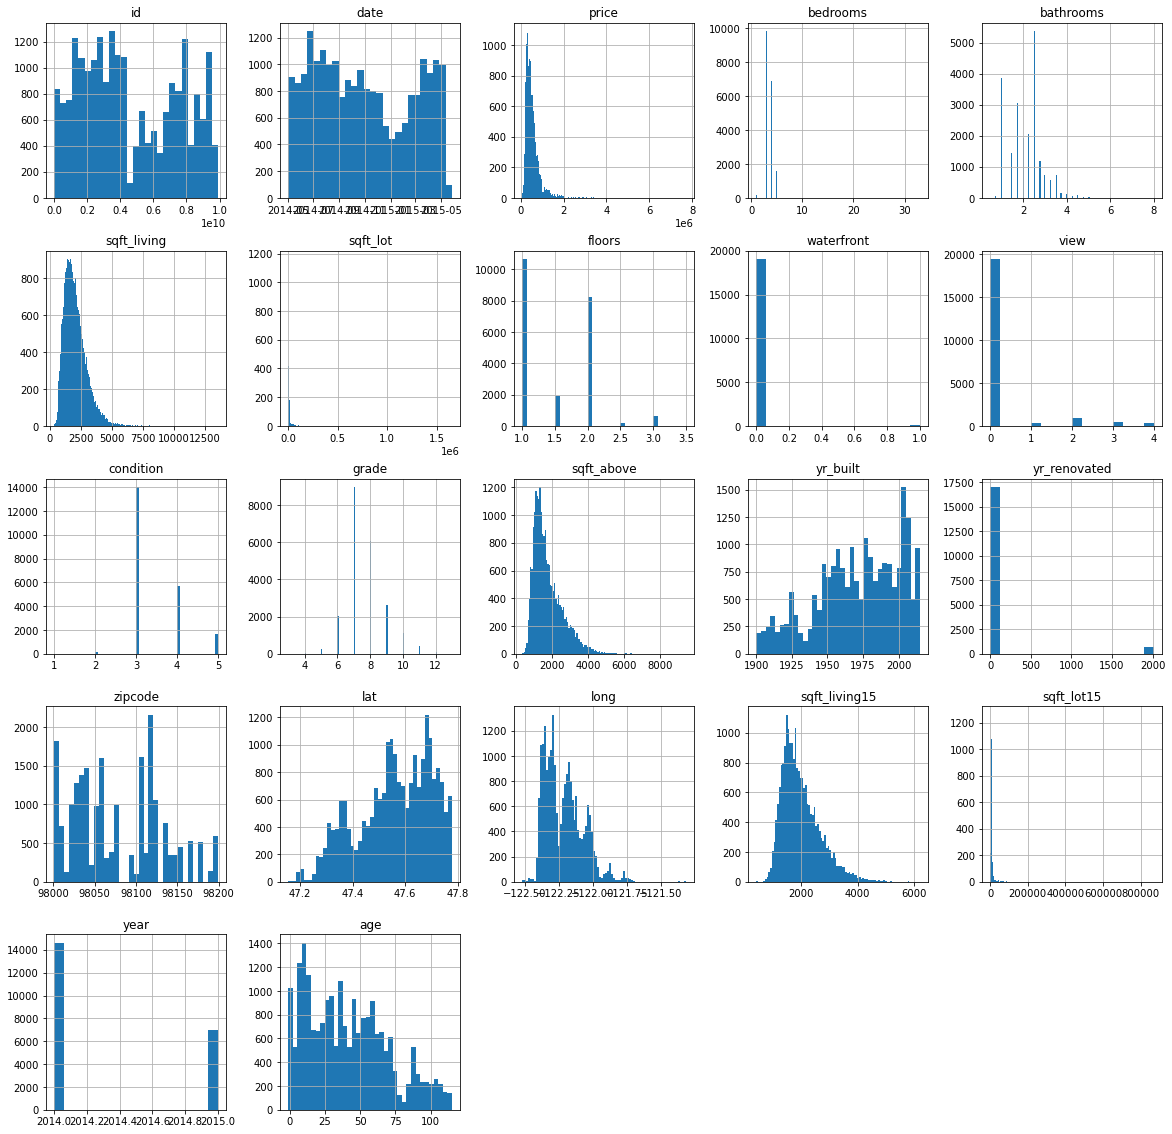

In [6]:
# Show histograph of each features
df.hist(figsize=(20,20), bins='auto');

In [7]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [8]:
df['sqft_lot15'].describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [9]:
# Remove outliers

# By looking at the graph above, we are going to remove data with bedrooms greater than or equal to 10
df = df[df['bedrooms'] < 10]

# By looking at the graph above, we are going to remove data with sqft_lot15 greater than or equal to 200000
df = df[df['sqft_lot15'] < 200000]

Now  we are removing multiple features:
- date, year, yr_built, yr_renovated: age columns is created for these
- id: not neccessary
- waterfront: will be useless if the house doesn't have waterfront
- zipcode, lat, long: not exploring location
- view: unbalanced sample sizes for each view
- grade: our stakeholders are already homeowners of their house, so they can't really change the grade of their already-built house

In [10]:
# Drop unnecessary features
df.drop(['id', 'date', 'zipcode', 'grade', 'waterfront', 'lat', 'long', 'view', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [11]:
# Check for null values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

In [12]:
# Check for object columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21424 non-null  float64
 1   bedrooms       21424 non-null  int64  
 2   bathrooms      21424 non-null  float64
 3   sqft_living    21424 non-null  int64  
 4   sqft_lot       21424 non-null  int64  
 5   floors         21424 non-null  float64
 6   condition      21424 non-null  int64  
 7   sqft_above     21424 non-null  int64  
 8   sqft_basement  21424 non-null  object 
 9   sqft_living15  21424 non-null  int64  
 10  sqft_lot15     21424 non-null  int64  
 11  age            21424 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.1+ MB


In [13]:
# Check for unique value
df['sqft_basement'].value_counts()

0.0       12708
?           449
600.0       215
500.0       209
700.0       208
          ...  
475.0         1
143.0         1
2300.0        1
768.0         1
2080.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [14]:
# Drop rows with ? values
df = df[(df != '?').all(axis=1)]

In [15]:
# Convert object column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

## Normalize our Price

In [16]:
#data['price'] = np.log(data['price'])

### 3 Standard Deviation

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

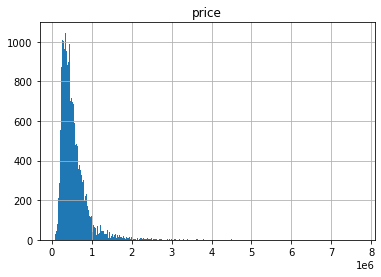

In [17]:
df.hist('price', bins='auto')

From the histogram of the price, we can see that our price data is really skewed. So, we are going to get rid of very high outlier by taking only the data within 3 standard deviations.

In [18]:
# We are going to keep dataset that are 3STD away from the mean
df = df[(df['price'] < (df['price'].mean() + df['price'].std()*3)) & (df['price'] > (df['price'].mean() - df['price'].std()*3))]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

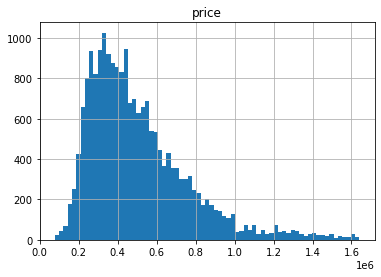

In [19]:
df.hist('price', bins='auto')

After removing high outliers, we can see that our graph looks more normalized than before.

# Train-Test Split

To create linear regresion models, we first need to split our data in to training data and testing data.

In [20]:
# Use train_test_split to create training data and testing data
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

After we split the data, we are going to work with the training data.

Let's first look at which feature is the most correlated with the price.

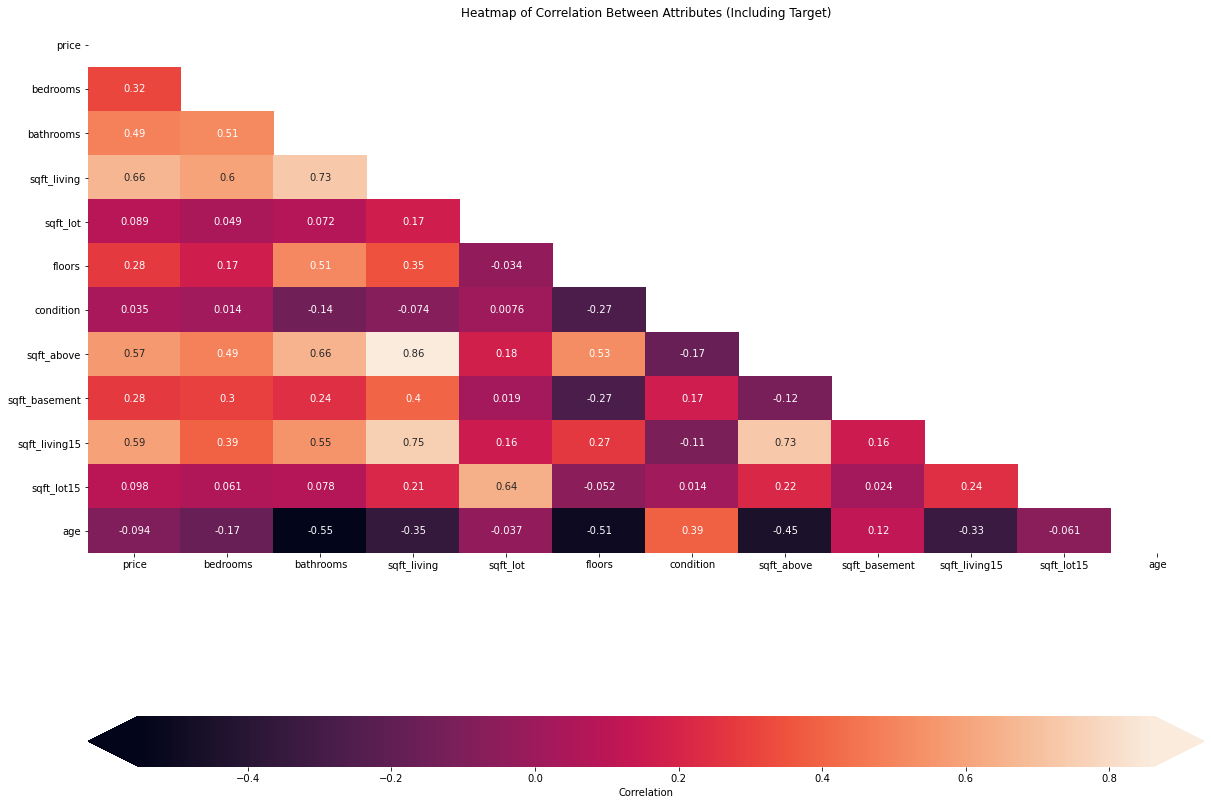

In [21]:
# Create a heatmap to show correlations between features and price
# We are going to make our price be the dependent feature and the rest features as independent.
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

## Baseline Model

We can see from the heatmap that sqft_living is most correlated with price. So we will use that as our baseline model.

C:\Users\soohy\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


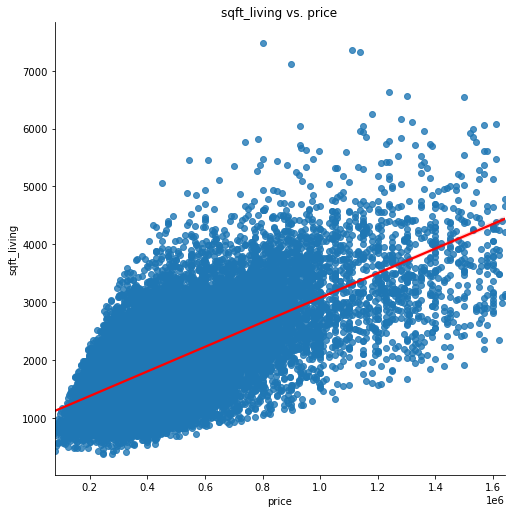

In [22]:
# Create a scatter plot with the regression line for the baseline model
most_correlated_feature = 'sqft_living'

sns.lmplot(data=df, x='price', y='sqft_living', size=7,line_kws={'color':'red'})
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('sqft_living vs. price');

The graph above shows that there is a positive linear line btween price and sqft_living.

Now, we will get the r-squared values for this model.

In [23]:
# We are going to perform 3 separate train-test splits within our X_train and y_train, 
# then we will find both the train and the test scores for each
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.43809827960116837
Validation score: 0.45174690732988537


Our baseline model showed that our r-squared value is 0.45.

## Second Model

Now we are going to try to make our model better.

### Check correlations (multicollinearity) between each features and remove

In [24]:
# Make pairs of each features with their correlations
df_corr = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_0', 'level_1'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

In [25]:
# Look for the highest correlations
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.860959
"(sqft_living15, sqft_living)",0.754239


Since two different pairs of variables are highly correlated, the correct approach would be to one variable from the pairs.

We can remove sqft_above since sqft_above is square footage of house apart from basement which is similar to sqft_living.

We can remove sqft_living15 since the square footage of interior housing living space for the nearest 15 neighbors is more import than sqft_living.

In [26]:
# Drop the two features
X_train.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)
X_test.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,sqft_lot15,age
4293,3,1.00,1250,8276,1.5,5,0.0,8792,76.0
9151,3,2.00,1760,6092,1.0,3,0.0,6255,16.0
16533,3,1.75,1260,8487,1.0,3,0.0,13051,44.0
19078,3,2.25,2530,27227,2.0,3,0.0,30192,27.0
2828,5,3.00,2900,6730,1.0,5,1070.0,6283,37.0


Let's check our second model.

In [28]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean(),'\n')

# Linear Regression (check MAE, MSE, RMSE)
second_model.fit(X_train, y_train)

preds_train = second_model.predict(X_train)
preds_test = second_model.predict(X_test)

print(f'Train MAE: {mean_absolute_error(y_train, preds_train)}')
print('Test MAE:', mean_absolute_error(y_test, preds_test), '\n')

print(f'Train MSE: {mean_squared_error(y_train, preds_train)}')
print('Test MSE:', mean_squared_error(y_test, preds_test),'\n')

print(f'Train RMSE: {mean_squared_error(y_train, preds_train, squared=False)}')
print('Test RMSE:', mean_squared_error(y_test, preds_test, squared=False),'\n')

print(f'Train R-Squared: {r2_score(y_train, preds_train)}')
print(f'Test R-Squared: {r2_score(y_test, preds_test)}\n')


Current Model
Train score:      0.4981829009126592
Validation score: 0.5114025797081387

Baseline Model
Train score:      0.43809827960116837
Validation score: 0.45174690732988537 

Train MAE: 136179.34082309518
Test MAE: 138396.76954310565 

Train MSE: 33221795088.586315
Test MSE: 34866130880.95273 

Train RMSE: 182268.46981468383
Test RMSE: 186724.74630041068 

Train R-Squared: 0.5016419840665775
Test R-Squared: 0.49117228087784925



By removing the two highly correlated features, we imporved our model by approximately 6%.
Our model is approximately \\$136K-\\$183K away from the actual price.

## Third Model

From our second model, we are going look at the p-values to drop insignificatn features and see if our model imporved.

In [29]:
# Create a model and look at the summary for p-values
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1725.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:46:21   Log-Likelihood:            -2.0883e+05
No. Observations:               15432   AIC:                         4.177e+05
Df Residuals:                   15422   BIC:                         4.178e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.269e+05   1.16e+04    -10.960      0.000    -1.5e+05   -1.04e+05
bedrooms      -4.656e+04   2118.906    -21.975      0.000   -5.07e+04   -4.24e+04
bathrooms      4.472e+04   3555.994     12.576      0.000    3.77e+04    5.17e+04
sqft_living     225.5373      3.098     72.798      0.000     219.465     231.610
sqft_lot         -0.0161      0.066     -0.245      0.806      -0.145       0.112
floors         6.038e+04   3787.111     15.943      0.000     5.3e+04    6.78e+04
condition      1.831e+04   2490.814      7.350      0.000    1.34e+04    2.32e+04
sqft_basement     1.7538      4.480      0.391      0.695      -7.027      10.535
sqft_lot15       -0.5811      0.128     -4.528      0.000      -0.833      -0.330
age            2215.8637     69.422     31.919      0.000    2079.789    2351.938
==============================================================================
Omnibus:                     2553.852   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6295.330
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       5.516   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary, we found that sqft_lot and sqft_basement are insignificant.

In [30]:
# Drop insignificant features
X_train.drop(['sqft_lot', 'sqft_basement'], axis=1, inplace=True)
X_test.drop(['sqft_lot', 'sqft_basement'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Since we dropped insignificant features, let's look at our model again.

In [31]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Current Model
Train score:      0.49815556646083703
Validation score: 0.5115248055310088

Second Model
Train score:      0.4981829009126592
Validation score: 0.5114025797081387

Baseline Model
Train score:      0.43809827960116837
Validation score: 0.45174690732988537


We did slightly better than our previous model by 0.01%.

## Fourth Model - Final

We are going to scale our features so that we can categorical and continuous features on the same scale.

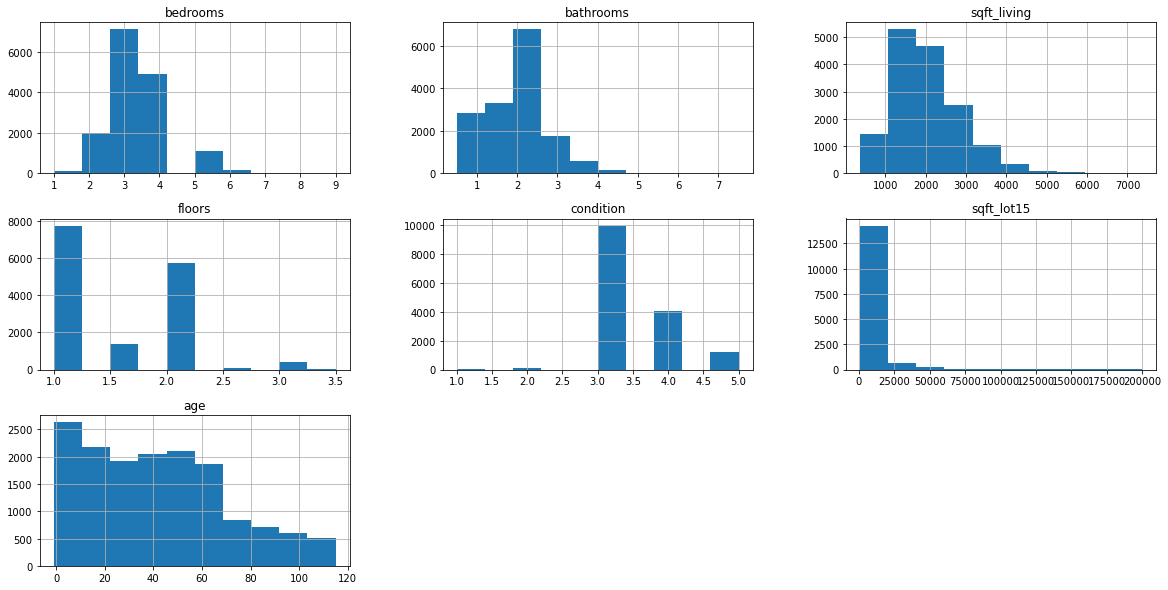

In [32]:
X_train.hist(figsize=(20,10));

### One Hot Encoder / Standard Scaler

To scale our data, we are going to use OneHotEncoder for categorical features and StandardScaler for our continuous features.

#### One Hot Encoder

In [33]:
# We chose condition feature as categorical.
# We kept bedrooms, bathrooms, and floors as continuous features because they are actual integers, not categories.
categoricals = ['condition']

train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

#### Standard Scaler

In [34]:
# Continuous features
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_lot15', 'age']

train_continuous = X_train[continuous]
test_continuous = X_test[continuous]

# Make StandardScaler object
scaler = StandardScaler()

# Fit the train data into the scaler
df_fit = scaler.fit(train_continuous)

# Transform data
train_data_scaled = df_fit.transform(train_continuous)
test_data_scaled = df_fit.transform(test_continuous)

# Make them into Dataframe
train_scaled_df = pd.DataFrame(train_data_scaled, columns = continuous)
test_scaled_df = pd.DataFrame(test_data_scaled, columns = continuous)

#### Combining the data

After we scaled our continuous data and one hot encoded our categorical data, we are going to combine them so that we have one final X_train.

In [35]:
# Reset index to make sure dummy features and scaled features concat correctly
train_dummies_trans_df.reset_index(drop=True, inplace=True)
train_scaled_df.reset_index(drop=True, inplace=True)

test_dummies_trans_df.reset_index(drop=True, inplace=True)
test_scaled_df.reset_index(drop=True, inplace=True)

# Combine the two dataframe together
X_train_comb = pd.concat([train_scaled_df, train_dummies_trans_df], axis=1)
X_test_comb = pd.concat([test_scaled_df, test_dummies_trans_df], axis=1)

In [36]:
X_train_comb

,bedrooms,bathrooms,sqft_living,floors,sqft_lot15,age,condition_1,condition_2,condition_3,condition_4,condition_5
0,-0.401615,-1.487457,-0.936596,0.029943,-0.127524,1.191051,0.0,0.0,0.0,0.0,1.0
1,-0.401615,-0.117922,-0.319995,-0.899785,-0.293769,-0.886754,0.0,0.0,1.0,0.0,0.0
2,-0.401615,-0.460306,-0.924506,-0.899785,0.151560,0.082888,0.0,0.0,1.0,0.0,0.0
3,-0.401615,0.224462,0.610951,0.959670,1.274778,-0.505823,0.0,0.0,1.0,0.0,0.0
4,1.849648,1.251613,1.058289,-0.899785,-0.291934,-0.159522,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15427,0.724016,-0.460306,-0.392536,-0.899785,-0.179029,0.498449,0.0,0.0,1.0,0.0,0.0
15428,-0.401615,0.566846,-0.501348,0.959670,-0.310479,-0.713604,0.0,0.0,0.0,1.0,0.0
15429,0.724016,-1.487457,-0.984957,0.029943,-0.196460,1.779763,0.0,0.0,1.0,0.0,0.0
15430,0.724016,0.224462,0.199884,0.959670,-0.031919,-0.124892,0.0,0.0,0.0,1.0,0.0


With our scaled data, we are going to do linear regression.

In [37]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_comb,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4986895395557404
Validation score: 0.5115620977839782

Third Model
Train score:      0.49815556646083703
Validation score: 0.5115248055310088

Second Model
Train score:      0.4981829009126592
Validation score: 0.5114025797081387

Baseline Model
Train score:      0.43809827960116837
Validation score: 0.45174690732988537


In [38]:
linreg = LinearRegression()
linreg.fit(X_train_comb, y_train)

pred_train = linreg.predict(X_train_comb)
pred_test = linreg.predict(X_test_comb)

print(f'Train R-Squared: {r2_score(y_train, pred_train)}')
print(f'Test R-Squared: {r2_score(y_test, pred_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, pred_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, pred_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, pred_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, pred_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, pred_test, squared=False)}')

Train R-Squared: 0.502068837511837
Test R-Squared: 0.49181607104147496

Train MAE: 136059.45005219206
Test MAE: 138261.48143750036

Train MSE: 33193339967.49289
Test MSE: 34822016790.34547

Train RMSE: 182190.394827754
Test RMSE: 186606.58292339384


We can see that our current model's r-squared increased by 0.004%. If we compare with our baseline model, r-squared increased by 0.06. It also seems like the model didn't increase our mean absolute error and root mean squared error.

Our model is approximately \\$136K - \\$186K away from the actual price.

In [39]:
# intercept for the model
linreg.intercept_

485242.46752624016

The linear regression model has a positive intercept of 485,424.

Next, we should check the coefficients of each features to see which features are highly impactful.

In [40]:
# Check coefficients for each features
coef = dict(zip(X_train_comb.columns, linreg.coef_))

sorted(coef.items(), key=lambda x:x[1], reverse=True)

[('sqft_living', 186780.21385014756),
 ('age', 64797.82155895761),
 ('condition_5', 54298.19478109401),
 ('bathrooms', 32503.17315609037),
 ('floors', 31610.037035338442),
 ('condition_4', 24809.520913115368),
 ('condition_3', 14563.39378179381),
 ('sqft_lot15', -8886.04053401534),
 ('bedrooms', -41215.91307079543),
 ('condition_1', -43182.41985063144),
 ('condition_2', -50488.68962537157)]

### Pick top two best features

For the top two best features, we chose sqft_living and bathroom. We decided not to choose age because the homeowners cannot change the age of the house. We also didn't choose the condition because some repairments do not increase the value of the house. So, you can spend money but the homeowners may not get the same/higher values back.

We see that sqft_living has the highest coefficient. This means that price increase by approximately \\$186,780 for 1 standard deviation of the sqft_living.

We can also see that price increase approximately $32,503 for 1 standard deviation of the bathroom.

## Checking for Assumptions

We need to check assumptions for linear regression on our final model.

### Investigating Linearity

First, we are going to check for linearity. 

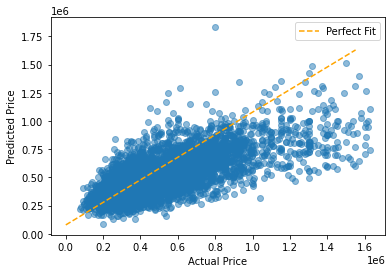

In [41]:
# Get predicted values 
preds = linreg.predict(X_test_comb)
fig, ax = plt.subplots()

# Plot the price with predicted values
# Plot best regression line to check for linearity
perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Although our some of our data is spread out, most of our data follows the best fit line.
So our model does not violate the linear assumption.

### Investigating Normality

Next, we are going to check for normality assumption.

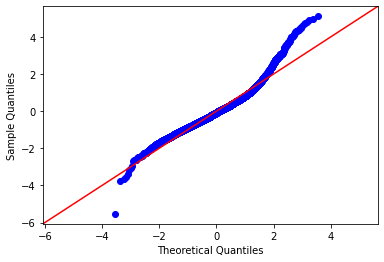

In [42]:
# Calculate residuals and plot them with qqplot function
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

From the graph above, we can see that our data are mostly normalized. We see some outliers on the right side.
Since majority of our residuals lie within the line, our model does not violate the normality assumption.

### Investigating Multicollinearity

Next, we are going to check for multicollinearity.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_comb.values, i) for i in range(X_train_comb.shape[1])]
pd.Series(vif, index=X_train_comb.columns, name="Variance Inflation Factor")

bedrooms       1.645446
bathrooms      3.047760
sqft_living    2.673839
floors         1.563260
sqft_lot15     1.091119
age            1.867270
condition_1    1.002667
condition_2    1.010182
condition_3    1.091255
condition_4    1.094692
condition_5    1.094926
Name: Variance Inflation Factor, dtype: float64

From our data above, both our bathrooms and sqft_living are below 5.
Thus, our model's features are not highly correlated with each other.

### Investigating Homoscedasticity

Finally, we will check for homoscedasticty.

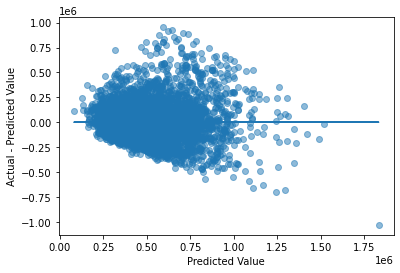

In [44]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_comb))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

From the graph above, we can see a funel-like shape. This means that we violated the homoscedasticity assumption and our model is heteroscedasticity, which means that the price is unequal across the range of values of the predictors.

# Linear Regression Conclusion

In conclusion, our model explains 49% of variation of the data. For every 1 standard deviation of sqft_living, the price of the house increase by \\$186,780. For every 1 standard deviation of bathroom, the price of the house increase by \\$32,503.

Our recommendations would be to add a bathroom to increase the price of the house. If the house does not have enough space to add extra sqft_living, adding a bathroom will increase the price of the house.